# Question: How do annual members and casual riders use Cyclistic bike differently?

## Data
Previous 12 months trip data of Cyclistic can found in https://divvy-tripdata.s3.amazonaws.com/index.html

## 1. Importing library and data

### 1.1 Importing Library

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import glob

### 1.2 Loading Data

In [60]:
#load 12 files and concat to single df
all_filenames = [i for i in glob.glob('data/*.{}'.format('csv'))]
df = pd.concat([pd.read_csv(f) for f in all_filenames],ignore_index=True)

In [61]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member


## 2. Process data

### 2.1 Missing value

In [62]:
#check missing value
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    823167
start_station_id      823164
end_station_name      878338
end_station_id        878338
start_lat                  0
start_lng                  0
end_lat                 5036
end_lng                 5036
member_casual              0
dtype: int64

**Problem 1**: start_station_name, start_station_id, end_station_name, end_station_id,end_lat,end_lng have missing values -> drop these columns

In [63]:
df = df[['ride_id','rideable_type','started_at','ended_at','member_casual']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860776 entries, 0 to 5860775
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ride_id        object
 1   rideable_type  object
 2   started_at     object
 3   ended_at       object
 4   member_casual  object
dtypes: object(5)
memory usage: 223.6+ MB


### 2.2 Duplicates

In [64]:
#check duplication of ride_id
df['ride_id'].duplicated().sum()

0

* There is no duplicate values in this data

### 2.3 Data type

In [65]:
#check format
df.dtypes

ride_id          object
rideable_type    object
started_at       object
ended_at         object
member_casual    object
dtype: object

**Problem 2**: data type of started_at, ended_at is object. Change to datetime type

In [66]:
# change format of started_at, ended_at to datetime format
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860776 entries, 0 to 5860775
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 223.6+ MB


## 3. Analysis

In [67]:
#total amount of ride by user types
df.groupby('member_casual')['ride_id'].count()

member_casual
casual    2559857
member    3300919
Name: ride_id, dtype: int64

### 3.1 Hypothesis

There is difference of time metrics between 2 user types
- Duration
- Time of date
- Day of week

#### 3.1.1 Add time columns

In [68]:
# add time of day
df['time_of_day'] = df['started_at'].dt.hour

# add day of week column
df['day_of_week'] = df['started_at'].dt.day_name()

# add day of week (number) column
df['day_week'] = df['started_at'].dt.dayofweek

# add min_length : use minute
df['min_len'] = df['ended_at'] - df['started_at']
df['min_len'] = df['min_len'].dt.total_seconds() / 60

In [69]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,time_of_day,day_of_week,day_week,min_len
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,member,14,Sunday,6,2.716667
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,member,11,Friday,4,6.283333
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,member,9,Friday,4,5.983333
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,member,19,Thursday,3,25.833333
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,member,14,Friday,4,4.133333


### 3.2 Compare use time

In [70]:
# Create use hour column
df['hour_len'] = df['min_len'] // 60

In [71]:
df['hour_len'].sort_values()

3869585     -1.0
3997026     -1.0
3915903     -1.0
2668252     -1.0
4066203     -1.0
           ...  
546894     783.0
1369941    818.0
81713      878.0
545476     928.0
595683     932.0
Name: hour_len, Length: 5860776, dtype: float64

**Problem** : hour_len = -1 -> drop hour_len < 0

In [72]:
df = df[df['hour_len'] >= 0]

In [73]:
# group by hour length and user type
df1 = df.groupby(['hour_len', 'member_casual'])[['ride_id']].count()\
                                                            .reset_index()

df1

,hour_len,member_casual,ride_id
0,0.0,casual,2354719
1,0.0,member,3277164
2,1.0,casual,150598
3,1.0,member,17053
4,2.0,casual,32909
...,...,...,...
384,783.0,casual,1
385,818.0,casual,1
386,878.0,casual,1
387,928.0,casual,1


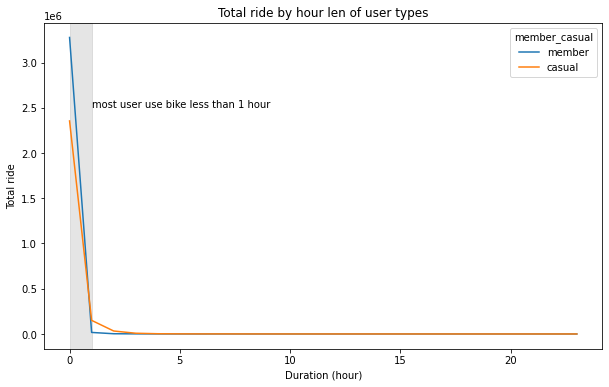

In [74]:
# visualize df1 with hour_len < 10 hours
df1 = df1[df1['hour_len'] < 24]

plt.figure(figsize=(10,6))

sns.lineplot(data=df1,
            x='hour_len',
            y='ride_id',
            hue='member_casual',
            hue_order=['member','casual'])

plt.axvspan(0, 1, color='gray', alpha=0.2 )

plt.title('Total ride by hour len of user types')
plt.xlabel('Duration (hour)')
plt.ylabel('Total ride')

        #annotation
plt.text(1, 2.5e6,
        'most user use bike less than 1 hour')
        
plt.show()

**Insight 1:** 
- Most user use bike less than 1 hour
- Above 1 hour, casual user use more than member

-> Focus the difference within 1 hour of between 2 user type

### 3.3 Compare time of day

In [75]:
#avg user type amount per month by time of day (use within 1 hour)
    #use within 1 hour
cond_1h = df['min_len'] <= 60

    #group by time of day and member_casual
df2 = df[cond_1h].groupby(['time_of_day','member_casual'])[['ride_id']].count()

    #avg amount per month
df2['ride_id'] = df2['ride_id'] / 12
df2.head()

ride_id
time_of_day member_casual             
0           casual         4179.916667
            member         2928.833333
1           casual         3014.416667
            member         1921.083333
2           casual         2057.416667

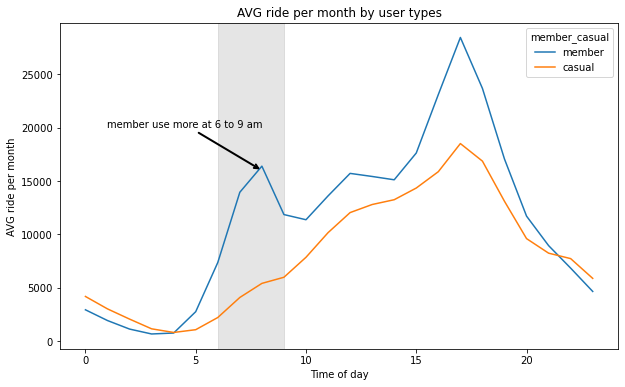

In [76]:
#chart of avg user type amount per month by time of day
plt.figure(figsize=(10,6))

sns.lineplot(data=df2,
            x='time_of_day',
            y='ride_id',
            hue='member_casual',
            hue_order=['member','casual'])

plt.xlabel('Time of day')
plt.ylabel('AVG ride per month')
plt.title('AVG ride per month by user types')

    #higtlight 6 - 9 am of x axis
plt.axvspan(6, 9, color='gray', alpha=0.2 )

    #Annotaion
plt.annotate('member use more at 6 to 9 am',
            xy=(8,16000),
            xytext=(1,20000),
            arrowprops={'arrowstyle':'->','linewidth':2})

plt.show()

**Insight 2:**
- Member use more than casual user at 6 am to 9 am
- Both user types use more at 4 pm to 6 pm

--> focus to day of week with 6-9 am and 4-6 pm

### 3.4 Compare day of week

In [77]:
# total ride of 6-9 am and duration within 1h
    # condition time length < 60 and 6-9 am
cond_69 = ((df['min_len'] <= 60)
            & (df['time_of_day'] >= 6)
            & (df['time_of_day'] <= 9))
    
    # group day of week, use type
df_69 = df[cond_69].groupby(['day_of_week','day_week','member_casual'])[['ride_id']].count()\
                                                                                    .sort_values(by=['day_week'])
                                                                                    
    # average ride amount per month
df_69['ride_id'] = df_69['ride_id'] // 12

# total ride of 4-6 am and duration within 1h
    # condition time length < 60 and 4-6 pm
cond_46 = ((df['min_len'] <= 60)
            & (df['time_of_day'] >= 16)
            & (df['time_of_day'] <= 18))

    # group day of week, use type
df_46 = df[cond_46].groupby(['day_of_week','day_week','member_casual'])[['ride_id']].count()\
                                                                                    .sort_values(by=['day_week'])

    # average ride amount per month
df_46['ride_id'] = df_46['ride_id'] // 12

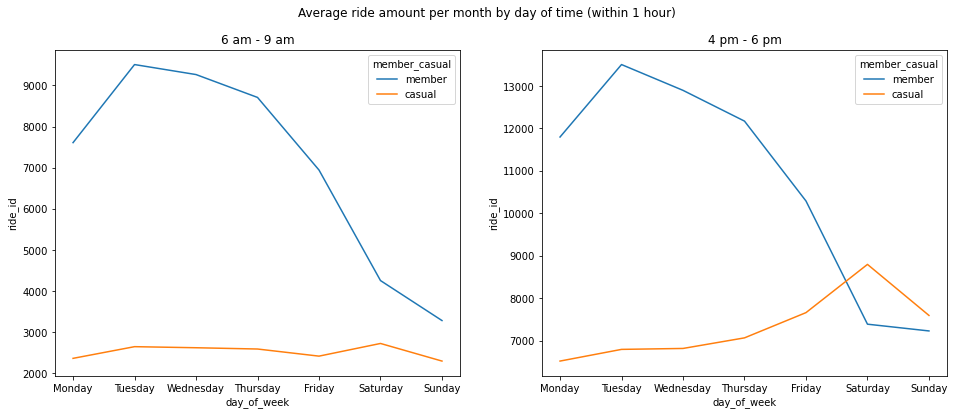

In [78]:
# visualize 2 chart: df_69 and df_46
fig, ax = plt.subplots(1,2, figsize=(16,6))

# visualize df_69
sns.lineplot(data=df_69,
            x='day_of_week',
            y='ride_id',
            hue='member_casual',
            hue_order=['member','casual'],
            ax=ax[0])

ax[0].set_title('6 am - 9 am')

# visualize df_46
sns.lineplot(data=df_46,
            x='day_of_week',
            y='ride_id',
            hue='member_casual',
            hue_order=['member','casual'],
            ax=ax[1])

ax[1].set_title('4 pm - 6 pm')

fig.suptitle('Average ride amount per month by day of time (within 1 hour)')

plt.show()


**Insight 3:**
- Member use Cyclistic bike more from Monday to Friday
- Casual rider use more on weekend (especially 4 pm to 6 pm)

## 4. Result
- **Insight 1:** Most user use bike less than 1 hour. Above 1 hour, casual user use more than member.
- **Insight 2:** Member use more than casual user at 6 am to 9 am. Both user types use more at 4 pm to 6 pm.
- **Insight 3:** Member use Cyclistic bike more on weekday. Casual rider use more on weekend (especially 4 pm to 6 pm)

## 5. Recommendation
In order to convert non-member user to annual member, I recommend focus marketing strategy to the riders that use Cyclistic bike: 
- less than 1 hour each trip
- use at 6 am to 9 am
- use on weekday (from monday to friday)

